### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('startup_funding 2.csv')

In [3]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [5]:
df.isnull().sum()[df.isnull().sum()>0]

Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

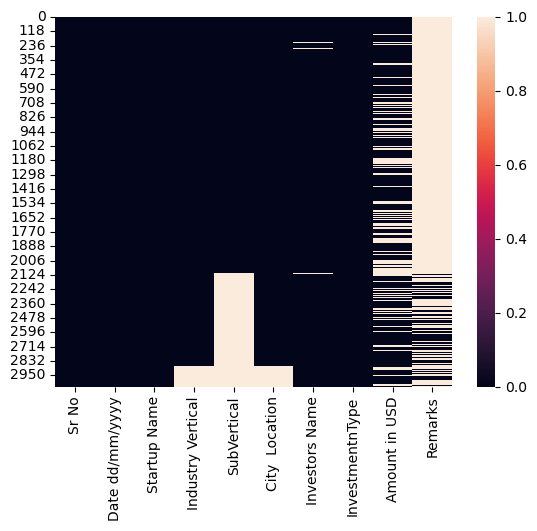

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df['Sr No'].nunique()

3044

In [8]:
df.set_index('Sr No',inplace=True)

In [9]:
df = df.drop(columns = 'Remarks')

In [10]:
df.columns

Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

In [11]:
df.rename(columns = {'Sr No':'Index',
                     'Date dd/mm/yyyy':'Date',
                     'Startup Name':'Startup',
                     'Industry Vertical':'Vertical',
                     'City  Location':'City',
                     'Investors Name':'Investor',
                     'InvestmentnType':'Investment Round',
                     'Amount in USD':'Amount in INR'
                    },inplace=True)

In [12]:
df.isnull().sum()[df.isnull().sum()>0]

Vertical            171
SubVertical         936
City                180
Investor             24
Investment Round      4
Amount in INR       960
dtype: int64

In [13]:
df['Amount in INR'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [14]:
# Step 1: Fill missing values with '0'
df['Amount in INR'] = df['Amount in INR'].fillna('0')

# Step 2: Remove commas from the numbers
df['Amount in INR'] = df['Amount in INR'].str.replace(',', '', regex=False)

# Step 3: Replace unwanted strings with '0'
df['Amount in INR'] = df['Amount in INR'].replace(
    ['undisclosed', 'unknown', 'Undisclosed', '\\xc2\\xa0N/A', 'nan'],
    '0'
)

df['Amount in INR'] = df['Amount in INR'].str.replace('N/A','0')
 
df['Amount in INR'] = df['Amount in INR'].str.replace(r'^\\\\xc2\\\\xa0', '', regex=True)
df['Amount in INR'] = df['Amount in INR'].str.rstrip('+')

df['Amount in INR'] = df['Amount in INR'].astype(float)




In [15]:
df['Amount in INR'] = ((df['Amount in INR']*84.41)/10000000).round(2)

In [16]:
df

,Date,Startup,Vertical,SubVertical,City,Investor,Investment Round,Amount in INR
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1688.20
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.94
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,154.97
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.32
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.19
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,37.98
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,6.96
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,12.66


In [17]:
invalid_dates = df[~pd.to_datetime(df['Date'], errors='coerce').notnull()]
invalid_dates


/var/folders/lt/c_ljtjc51xbdxnkr5hrp027c0000gn/T/ipykernel_62105/4286574738.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  invalid_dates = df[~pd.to_datetime(df['Date'], errors='coerce').notnull()]


,Date,Startup,Vertical,SubVertical,City,Investor,Investment Round,Amount in INR
Sr No,,,,,,,,
193,05/072018,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,52.76
2572,01/07/015,HandyHome,Hyperlocal Electronics repair Service,NaN,Mumbai,"Bessemer Ventures, Kae Capital",Seed Funding,5.32
2607,\\xc2\\xa010/7/2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,5.06
3030,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,1.69


In [18]:
df['Date'] = df['Date'].replace({
    '05/072018':'05/07/2018',
    '01/07/015':'01/07/2015',
    r'\\xc2\\xa010/7/2015':'10/07/2015',
    '22/01//2015':'22/01/2015'})



In [19]:
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/lt/c_ljtjc51xbdxnkr5hrp027c0000gn/T/ipykernel_62105/2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce') # invalid parsing will be set NaN

In [21]:
df['Vertical'].fillna('Others', inplace=True)

df['SubVertical'].fillna('Unknown', inplace=True)

df['Investor'].fillna('Undisclosed', inplace=True)
df['Investment Round'].fillna('Undisclosed',inplace=True)

In [22]:
df['City'] = df['City'].str.replace(r'^\\\\xc2\\\\xa0','',regex=True)

df['City'] = df['City'].replace('nan','Undisclosed')

df['City'] = df['City'].fillna('Undisclosed')

In [23]:
# Replace values in 'City' column using dictionary mapping
df['City'].replace({
    'Bengaluru': 'Bangalore',
    "Bengaluru'":'Bangalore',
    'Mumbai/Bengaluru': 'Bangalore',
    'Karnataka': 'Bangalore',
    'New York/ India': 'Bangalore',
    'Bangalore / USA': 'Bangalore',
    'Boston': 'Bangalore',
    'Bangalore / Palo Alto': 'Bangalore',
    'Kormangala': 'Koramangala',
    'Palo Alto': 'Chennai',
    'Andheri': 'Mumbai',
    'Chembur': 'Mumbai',
    'India': 'Mumbai',
    'Uttar Pradesh': 'Mumbai',
    'US/India': 'Mumbai',
    'Mumbai / NY': 'Mumbai',
    'Ahemadabad': 'Ahmedabad',
    'Ahemdabad':'Ahmedabad',
    'Bhubneswar': 'Bhubaneswar',
    'Kolkatta': 'Kolkata',
    'Nw Delhi': 'Delhi',
    'Hubli': 'Hubballi',
    'Kerala': 'Thiruvananthapuram',
    'Goa/Hyderabad': 'Verna',
    'Belgaum': 'Belagavi',
    'Pune / Singapore': 'Pune',
    'Pune/Seattle': 'Pune',
    'Mumbai / Global': 'Trivandrum',
    'US': 'Bangalore',
    'Hyderabad/USA': 'Hyderabad',
    'Noida / Singapore': 'Undisclosed',
    'USA': 'Undisclosed',
    'Bangalore/ Bangkok': 'Undisclosed',
    'Seattle / Bangalore': 'Undisclosed',
    'New Delhi/ Houston': 'Undisclosed',
    'India / US': 'Gurgaon',
    'Gurgaon / SFO': 'Gurgaon',
    'Bengaluru and Gurugram': 'Gurgaon',
    'Gurugram': 'Gurgaon',
    'New Delhi': 'Delhi'
}, inplace=True)

# Update specific rows by index
df.loc[2070, 'City'] = 'Pune'
df.loc[2256, 'City'] = 'Pune'
df.loc[63, 'City'] = 'Delhi'
df.loc[69, 'City'] = 'Noida'
df.loc[2293, 'City'] = 'Mumbai'

# Replace additional out-of-India cities with 'Out of India'
df['City'].replace([
    'San Jose', 'Menlo Park', 'Burnsville', 'Santa Monica', 'Nairobi', 'Singapore', 'New York',
    'India/USA', "'New York'", 'California', 'Delhi & Cambridge', 'Missourie', 'Mumbai / UK',
    'SFO / Bangalore', 'London', 'Pune / Dubai', 'Bangalore / SFO', 'USA/India', 'Pune / US',
    'Chennai/ Singapore', 'Bangalore / San Mateo', 'Dallas / Hyderabad', 'Singapore', 'Mumbai / NY',
    'New Delhi / US', 'New Delhi / California', 'San Francisco', 'India/Singapore', 'India/US', 'San Jose,',"'New York"
], 'Out of India', inplace=True)




In [24]:
# Replace values in 'Investment Round' column
df['Investment Round'].replace(['Private\\\\nEquity', 'Private Equity Round', 'PrivateEquity', 
                                 'Private', 'Private Funding', 'Private\\nEquity'], 'Private Equity', inplace=True)

df['Investment Round'].replace(['Debt-Funding', 'Debt'], 'Debt Funding', inplace=True)

df['Investment Round'].replace(['Venture', 'Venture - Series Unknown'], 'Venture Round', inplace=True)

df['Investment Round'].replace(['Seed Funding Round', 'Seed funding', 'Seed\\\\nFunding'], 'Seed Funding', inplace=True)

df['Investment Round'].replace(['pre-series A', 'pre-Series A', 'Pre Series A'], 'Pre-Series A', inplace=True)

df['Investment Round'].replace(['Angel Funding', 'Angel'], 'Angel Round', inplace=True)

df['Investment Round'].replace(['Seed/ Angel Funding', 'Seed / Angle Funding', 'Angel / Seed Funding'], 'Seed/Angel Funding', inplace=True)

df['Investment Round'].replace(['Equity', 'Equity Based Funding'], 'Equity Round', inplace=True)

df['Investment Round'].replace('Term Loa', 'Term Loan', inplace=True)

df['Investment Round'].replace('Crowd funding', 'Crowd Funding', inplace=True)


In [25]:
list(df['Investor'].unique())

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'SAIF Partners, Spring Canter Investment Ltd.',
 'Paytm, NPTK, Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 'Undisclosed',
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia, CapitalG, Accel',
 'Sauce.vc, Rainforest Ventures',
 'Prime Venture Partners, LetsVenture, PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures, DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital, Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren, HealthQuad, Rebright Partners, Toppan Printing',
 'Matrix Partners, Stellaris Venture Partners, Kalaari Capital',
 'I

In [26]:
pattern = r'[^a-zA-Z0-9\s.,&()-]'
Investor_mistyped_names = df[df['Investor'].str.contains(pattern,regex = True, na = False)]
Investor_mistyped_names['Investor'].to_list()

['India Quotient and LetsVenture\\\\xe2\\\\x80\\\\x99s Angel Fund',
 'Sequoia India, Hillhouse Capital, Alphabet\\\\xe2\\\\x80\\\\x99s growth investment arm Capital G and Axis Bank',
 'Norwest Venture Partners, CDC Group, the UK\\\\xe2\\\\x80\\\\x99s Development Finance Institution and P Surendra Pai',
 'Lakestar and Jungle Ventures, Softbank\\\\xe2\\\\x80\\\\x99s DeepCore.',
 'DST Global and Lightspeed Venture Partners\\\\xe2\\\\x80\\\\x99 global fund.',
 'KDDI\\\\xc2\\\\xa0',
 'CLP Holdings Group, Innogy, \\\\xc3\\\\x98rstead, and Tenaska',
 'Vertex Ventures Southeast Asia (SEA) and India and Sistema Asia Fund, Fosun RZ Capital, Ventureast, and Endiya Partners.\\\\n\\\\n',
 'CDC Group plc\\\\xc2\\\\xa0',
 'Sunil Kant Munjal, Hero Electronix\\\\xe2\\\\x80\\\\x99s corporate financing arm, Electronic Development Fund',
 '"Kedaraa Capital, Ontario Teachers\\\\\'"',
 'Titan Co Ltd, Tata Group\\\\xe2\\\\x80\\\\x99s watch and jewellery retailing firm',
 'Factor[e] Ventures',
 'Undisclosed H

In [27]:
# List of unwanted substrings to be removed
unwanted_patterns = [
    r'\\\\xe2\\\\x80\\\\x99',  # Example: Apostrophe-like escape
    r'\\\\xc2\\\\xa0',        # Non-breaking space
    r'\\\\xc3\\\\xa9',        # Accent characters
    r'\\\\n\\\\n',            # Double newline
    r'\\\\\'',                # Escaped single quote
]

# Combine all patterns into a single regex
combined_pattern = r'|'.join(unwanted_patterns)
combined_pattern

# Replace using a single regex
df['Investor'] = df['Investor'].str.replace(combined_pattern, '', regex=True)




In [28]:
list(df['Investor'].unique())

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'SAIF Partners, Spring Canter Investment Ltd.',
 'Paytm, NPTK, Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 'Undisclosed',
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia, CapitalG, Accel',
 'Sauce.vc, Rainforest Ventures',
 'Prime Venture Partners, LetsVenture, PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures, DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital, Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren, HealthQuad, Rebright Partners, Toppan Printing',
 'Matrix Partners, Stellaris Venture Partners, Kalaari Capital',
 'I

In [29]:
vertical_mistyped_names = r'[^a-zA-Z0-9\s.,&()-]'
vertical_mistyped_names = df[df['Vertical'].str.contains(vertical_mistyped_names,regex = True,na = False)]
print(vertical_mistyped_names['Vertical'])

Sr No
2176        Hyperlocal\\xc2\\xa0 Grocery Delivery Service
2201    WiFi \xe2\x80\x93 first Cloud communication pl...
2221                     Mobile Growth Hacking\\nPlatform
2239       Women Ethnic Wear\\xc2\\xa0 Online Marketplace
2365    Location based Nightlife recommendation\\xc2\\...
2386             Luxury goods\\xc2\\xa0 Shopping Platform
2395    ECommerce Brands\\xe2\\x80\\x99 Full Service A...
2397                 Community Driven News/Views Platform
2410                Home Design & D\\xc3\\xa9cor platform
2420           Chain of Tea Caf\\xc3\\xa9\\xe2\\x80\\x99s
2489              App security\\xc2\\xa0 testing platform
2509               Home Design & D\\xc3\\xa9cor solutions
2571                             CRM / Analytics platform
2603                 \\xc2\\xa0News Aggregator mobile app
2604                     \\xc2\\xa0Online Jewellery Store
2605                \\xc2\\xa0Fashion Info Aggregator App
2606             \\xc2\\xa0Online Study Notes Marketplace
2607    

In [30]:
# def clean_vertical(value):
#     value = re.sub(r'\\\\xc2\\\\xa0|\\\\xc3\\\\xa9|\\\\xe2\\\\x80\\\\x99|\\\\n|\\\\|\\/|\\\\', '', value)
#     value = re.sub(r'\s+', ' ', value)
#     return value.strip().title()  # Strip whitespace and converts to title case

# # Apply the cleaning function to the Vertical column
# df['Vertical'] = df['Vertical'].apply(clean_vertical)


In [31]:
## Replace the mistyped characters
def vertical_mistyped_corrections(name):
    if pd.isna(name):
        return name ## Skip the null values
    ## Replace unwanted characters
    name = re.sub(r'[^a-zA-Z0-9\s.,&()-]','',name)
    ## Replace / with and
    name = name.replace('/','and')
    ## Normalize the spaces
    name = re.sub(r'\s+',' ',name).strip()
    ## converting it to title for consistency
    name = name.lower()
    return name
## Applying the cleaning function to the vertical column
df['Vertical'] = df['Vertical'].apply(vertical_mistyped_corrections)

df['Vertical'] = df['Vertical'].str.replace(r'Xc2Xa0','',regex = True)

df['Vertical'] = df['Vertical'].str.replace(r'[Xx][a-zA-Z0-9]{2,}','',regex = True)

In [32]:
list(df['SubVertical'].unique())

['E-learning',
 'App based shuttle service',
 'Retailer of baby and toddler products',
 'Online Investment',
 'Embroiled Clothes For Women',
 'Open-market, freight management platform',
 'Online Food Delivery Platform',
 'Agritech',
 'Automobile',
 'Satellite Communication',
 'Logistics Services and Solutions',
 'Food Solutions For Corporate',
 'Online Meat And Seafood Ordering Startup',
 'Non-Banking Financial Company',
 'Experience Discovery Platform',
 'Real money based gaming startup',
 'Online Eyewear Shopping Portal',
 'Business and customer engagement tools',
 "Men's Health and Wellness brand",
 'Elearning',
 'Indian Burger Brand',
 'Healthcare services',
 'Financial Services To MSMEs',
 'Social gaming platform',
 'Recovery software',
 'Electric bike rental',
 'Virtual e-commerce platform',
 'B2B platform for medical supplies',
 'Scooter sharing app',
 'Music Education',
 'Mobile Wallet',
 'Delivery Service',
 'Business development',
 'Beauty and Grooming',
 'Financial Services'

In [33]:
pattern = r'[^a-zA-Z0-9\s.,&()-]'
unwanted_subvertical = df[df['SubVertical'].str.contains(pattern,regex=True)]
unwanted_subvertical['SubVertical']

Sr No
19                        Men's Health and Wellness brand
154                  News and ebooks Mobile App\\xc2\\xa0
183     Applied Artificial Intelligence and IoT focuse...
186        \\xc2\\xa0Customer Sourcing Platform\\xc2\\xa0
188     Post-Purchase Customer Engagement Platform\\xc...
439          "Women\\'s Fashion Clothing Online Platform"
569                           Credit + payment mobile app
685     parenting blog and kids\\xe2\\x80\\x99 events ...
753     Mobile SAAS\\xc2\\xa0 ECommerce platform for SMEs
773       Gesture based\\xc2\\xa0 Smartwatch manufacturer
853     Hyperlocal Discovery\\xc2\\xa0 & Rewards platform
904            Social Commerce\\xc2\\xa0 Fashion platform
1047       Online/App Based Car cleaning service provider
1216     Cloud based\\xc2\\xa0 health monitoring platform
1245           proximity based\\xc2\\xa0 Rewards platform
1319        Hyperlocal\\xc2\\xa0 Communication Mobile app
1322                    Online Food Ordering platform/App
1347    

In [34]:
def mistyped_corrections(value):
    # Replace unwanted characters using regex
    value = re.sub(r'[^a-zA-Z0-9\s.,&()-]|\\xc2|\\xa0|\\x[a-zA-Z0-9]{2,}', '', value)
    # Replace '/' with 'and'
    value = value.replace('/', 'and')
    # Normalize spaces
    value = re.sub(r'\s+', ' ', value).strip()
    # Convert to lowercase for consistency
    value = value.lower()
    return value

# Apply the cleaning function to the 'Vertical' column
df['SubVertical'] = df['SubVertical'].apply(mistyped_corrections)

In [35]:
pattern = r'[^a-zA-Z0-9\s.,&()-]'
unwanted_subvertical = df[df['SubVertical'].str.contains(pattern,regex=True)]
unwanted_subvertical['SubVertical']

Series([], Name: SubVertical, dtype: object)

In [36]:
df['Startup'] = df['Startup'].str.strip().str.lower()

In [37]:
pattern = r'[^a-zA-Z0-9\s.,&()-]'
unwanted_subvertical = df[df['Startup'].str.contains(pattern,regex=True)]
unwanted_subvertical['Startup']

Sr No
1                                             byju’s
4                       https://www.wealthbucket.in/
54                                         lo! foods
68                                        "byju\\'s"
240                     what\\xe2\\x80\\x99s up life
713                             byju\\xe2\\x80\\x99s
714                  creator\\xe2\\x80\\x99s gurukul
984                             byju\\xe2\\x80\\x99s
1154                            serv\\xe2\\x80\\x99d
1165                            byju\\xe2\\x80\\x99s
1348                                      cheersoye!
1357                            byju\\xe2\\x80\\x99s
1395                           \\xc2\\xa0cloudcherry
1399                         let\xe2\x80\x99s barter
1433                                  zeolr/respiron
1515           don\\xe2\\x80\\x99t scratch your head
1541                        transtutors / askiitians
1554                            deal4loans / wishfin
1881                            byju\\xe

In [38]:
df['Startup'].nunique()

2349

In [39]:
# Define unwanted substrings and replacements
unwanted_substrings = ['\\', '\\xe2\\x80\\x99', '\n', '\\xc2\\xa0']
replace_by_quotation = ['\\xe2\\x80\\x99', '\xe2\x80\x99']

# Replace specific patterns
df['Startup'] = df['Startup'].str.replace(r'nearbuy \(previously\\xc2\\xa0 groupon india\)', 'nearbuy', regex=True)

df['Startup'] = df['Startup'].replace('https://www.wealthbucket.in/', 'wealthbucket', regex=False)

# Replace '/' with 'and'
df['Startup'] = df['Startup'].str.replace('/', 'and', regex=False)

# Replace unwanted substrings
for pattern in unwanted_substrings:
    df['Startup'] = df['Startup'].str.replace(pattern, ' ', regex=False)

# Replace with single quotation mark
for pattern in replace_by_quotation:
    df['Startup'] = df['Startup'].str.replace(pattern, "'", regex=False)

# Optional: Normalize whitespace
df['Startup'] = df['Startup'].str.replace(r'\s+', ' ', regex=True).str.strip()

df['Startup'] = df['Startup'].str.replace(' xe2 x80 x99',"'")


In [40]:


# # Define regex patterns for URLs and escape sequences
# url_pattern = r'https?://\S+|www\.\S+'
# escape_sequence_pattern = r'(\\x[0-9a-fA-F]{2,})|(\\\\)'

# # Combine patterns
# combined_pattern = f'({url_pattern})|({escape_sequence_pattern})'

# # Create mask for entries with URLs or escape sequences
# mask_problematic = df['Startup'].astype(str).str.contains(combined_pattern, regex=True, na=False)

# # Extract problematic entries into a separate variable
# problematic_entries = df[mask_problematic].copy()




In [41]:
pattern = r'[^a-zA-Z0-9\s.,&()-]'
unwanted_subvertical = df[df['Startup'].str.contains(pattern,regex=True)]
unwanted_subvertical['Startup']


Sr No
1                        byju’s
54                    lo! foods
68                    "byju 's"
240              what's up life
713                      byju's
714           creator's gurukul
984                      byju's
1154                     serv'd
1165                     byju's
1348                 cheersoye!
1357                     byju's
1399               let's barter
1515    don't scratch your head
1881                     byju's
2496                  carl's jr
2510                  wow! momo
2955                    faaso's
2993                      #fame
Name: Startup, dtype: object

In [42]:
list(df['Startup'].unique())

['byju’s',
 'shuttl',
 'mamaearth',
 'wealthbucket',
 'fashor',
 'pando',
 'zomato',
 'ecozen',
 'cardekho',
 'dhruva space',
 'rivigo',
 'healthians',
 'licious',
 'incred',
 'trell',
 'rein games',
 'lenskart.com',
 'freshworks',
 'misters',
 'sunstone eduversity pvt. ltd',
 'burger singh',
 'ninjacart',
 'aye finance',
 'supergaming',
 'clumio',
 'ebikego',
 'digital mall asia',
 'medikabazaar',
 'vogo automotive',
 'furtados school of music',
 'paytm',
 'dunzo',
 'udaan',
 'the man company',
 'fpl technologies',
 'cashflo',
 'digital f5',
 '3rdflix',
 '75f',
 'myelin foundry',
 'atomberg technology',
 'goqii',
 'vyapar app',
 'progcap',
 'mypetrolpump',
 'alteria capital',
 'pine labs',
 'meesho',
 'cars24',
 'uniphore',
 'zendrive',
 'lo! foods',
 'tala',
 'indwealth',
 'hungerbox',
 'admitkard',
 'mishry reviews',
 'grofers',
 'rapido bike taxi',
 'renewbuy',
 'atlan',
 'wizcounsel',
 'ola cabs',
 'daalchini technologies',
 '"byju \'s"',
 'moglix',
 'ezyhaul',
 'indus os',
 'heal

In [43]:
list(df['Startup'].unique())

['byju’s',
 'shuttl',
 'mamaearth',
 'wealthbucket',
 'fashor',
 'pando',
 'zomato',
 'ecozen',
 'cardekho',
 'dhruva space',
 'rivigo',
 'healthians',
 'licious',
 'incred',
 'trell',
 'rein games',
 'lenskart.com',
 'freshworks',
 'misters',
 'sunstone eduversity pvt. ltd',
 'burger singh',
 'ninjacart',
 'aye finance',
 'supergaming',
 'clumio',
 'ebikego',
 'digital mall asia',
 'medikabazaar',
 'vogo automotive',
 'furtados school of music',
 'paytm',
 'dunzo',
 'udaan',
 'the man company',
 'fpl technologies',
 'cashflo',
 'digital f5',
 '3rdflix',
 '75f',
 'myelin foundry',
 'atomberg technology',
 'goqii',
 'vyapar app',
 'progcap',
 'mypetrolpump',
 'alteria capital',
 'pine labs',
 'meesho',
 'cars24',
 'uniphore',
 'zendrive',
 'lo! foods',
 'tala',
 'indwealth',
 'hungerbox',
 'admitkard',
 'mishry reviews',
 'grofers',
 'rapido bike taxi',
 'renewbuy',
 'atlan',
 'wizcounsel',
 'ola cabs',
 'daalchini technologies',
 '"byju \'s"',
 'moglix',
 'ezyhaul',
 'indus os',
 'heal

In [44]:
df['Startup'] = df['Startup'].str.strip()

In [45]:
pattern = r'[^a-zA-Z0-9\s.,&()-]'
unwanted_subvertical = df[df['Startup'].str.contains(pattern,regex=True)]
unwanted_subvertical['Startup']

Sr No
1                        byju’s
54                    lo! foods
68                    "byju 's"
240              what's up life
713                      byju's
714           creator's gurukul
984                      byju's
1154                     serv'd
1165                     byju's
1348                 cheersoye!
1357                     byju's
1399               let's barter
1515    don't scratch your head
1881                     byju's
2496                  carl's jr
2510                  wow! momo
2955                    faaso's
2993                      #fame
Name: Startup, dtype: object

In [46]:
sorted(df['Startup'].unique().tolist())


['"byju \'s"',
 '#fame',
 '121policy',
 '19th mile',
 '1crowd',
 '1mg',
 '1mg (healthkartplus)',
 '20dresses',
 '33coupons',
 '360ride',
 '3dexter',
 '3hcare',
 '3rdflix',
 '48east',
 '4tigo',
 '5th vital',
 '6degree',
 '75f',
 '91springboard',
 '99games',
 '99perhour',
 '9stacks',
 'a&r bon vivants',
 'aadharapi.com',
 'aadyah',
 'aagaar.com',
 'aahaa',
 'aahaa stores',
 'aarav uav',
 'aasaanjobs',
 'aashiyaan',
 'aavishkaar-intellecap group',
 'aberuk',
 'abhibus',
 'abi health',
 'absentia',
 'absentia vr',
 'ace turtle',
 'ace2three',
 'acko',
 'actionable analytics',
 'active ai',
 'active.ai',
 'actofit',
 'actonmagic',
 'ad2pro',
 'address health',
 'admitkard',
 'adpushup',
 'adstringo',
 'adurcup',
 'advanced structures india',
 'advantage club',
 'advenio',
 'adwyze',
 'adytude',
 'aeon learning',
 'aequm',
 'aermed',
 'affimity',
 'affordplan',
 'agara labs',
 'agentdesks',
 'agricxlab',
 'agrostar',
 'agrowave',
 'aha taxis',
 'aircto',
 'airmed labs',
 'airpay',
 'airwood'

In [47]:
# remaining cleaning was done on MS Excel.

In [62]:
df = pd.read_excel('cleaned_startup_dataset.xlsx')

In [63]:
df

,Date,Startup,Vertical,SubVertical,City,Investor,Investment Round,Amount in INR
0,2019-10-07,byju's,edtech,education,Bangalore,Qatar Investment Authority,Private Equity,1266.15
1,2015-05-01,#fame,others,unknown,Undisclosed,TO THE NEW Ventures,Private Equity,84.41
2,2016-11-25,121policy,consumer internet,online insurance platform,Kolkata,Xelpmoc,Seed Funding,0.00
3,2018-12-07,19th mile,it,artificial intelligence-based sales accelerati...,Gurgaon,"Rishi Vasudev, Excelsior Investments, Ritesh V...",Seed/Angel Funding,1.52
4,2017-09-02,1crowd,finance,startup crowd-funding platform,Mumbai,Ganesh Natarajan,Seed Funding,0.00
...,...,...,...,...,...,...,...,...
3039,2015-08-10,zupermeal,food delivery platform,unknown,Mumbai,"Sanjeev Kapoor, Ravi Saxena & Others",Private Equity,16.88
3040,2016-07-18,zuppler,food delivery platform,online food ordering platform,Delhi,SRI Capital,Seed Funding,5.49
3041,2016-03-05,zuver,consumer internet,car driver discovery app,Mumbai,"Shruth & Smith Group, Hermes Group",Seed Funding,1.52
3042,2016-03-05,zwayam,consumer internet,online recruitment platform,Bangalore,Undisclosed investors,Seed Funding,2.11


In [64]:
names_to_lower = ['Investor','Investment Round', 'City']

for i in names_to_lower:
    df[i] = df[i].str.lower()

In [65]:
df.head()

,Date,Startup,Vertical,SubVertical,City,Investor,Investment Round,Amount in INR
0,2019-10-07,byju's,edtech,education,bangalore,qatar investment authority,private equity,1266.15
1,2015-05-01,#fame,others,unknown,undisclosed,to the new ventures,private equity,84.41
2,2016-11-25,121policy,consumer internet,online insurance platform,kolkata,xelpmoc,seed funding,0.00
3,2018-12-07,19th mile,it,artificial intelligence-based sales accelerati...,gurgaon,"rishi vasudev, excelsior investments, ritesh v...",seed/angel funding,1.52
4,2017-09-02,1crowd,finance,startup crowd-funding platform,mumbai,ganesh natarajan,seed funding,0.00


## Exploratory Data Analysis (EDA)

### Univariate Analysis

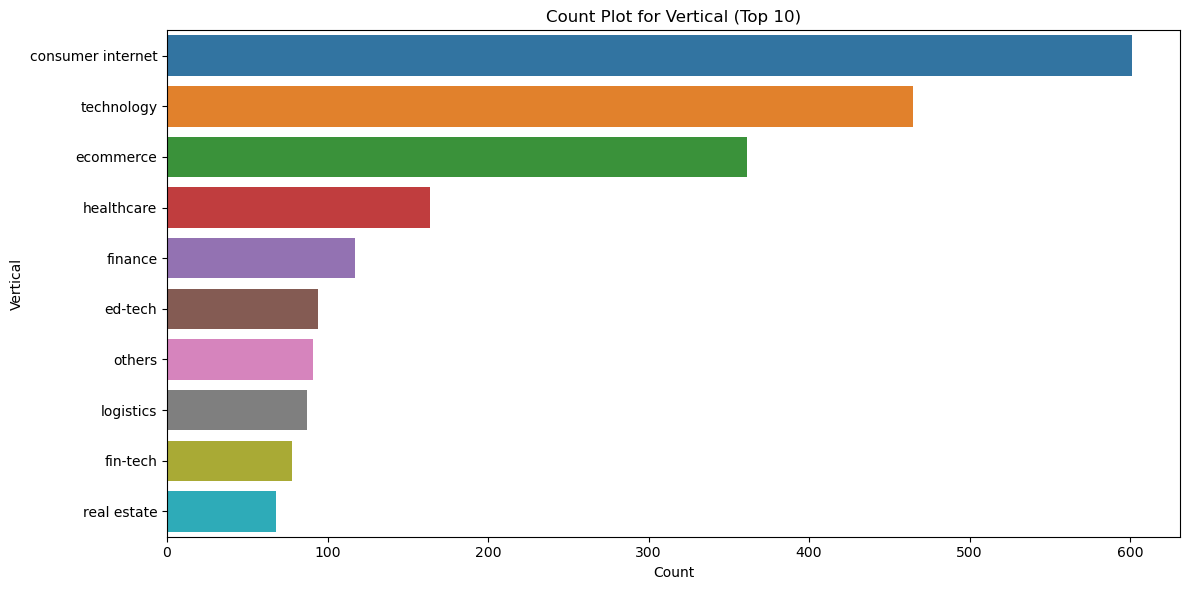

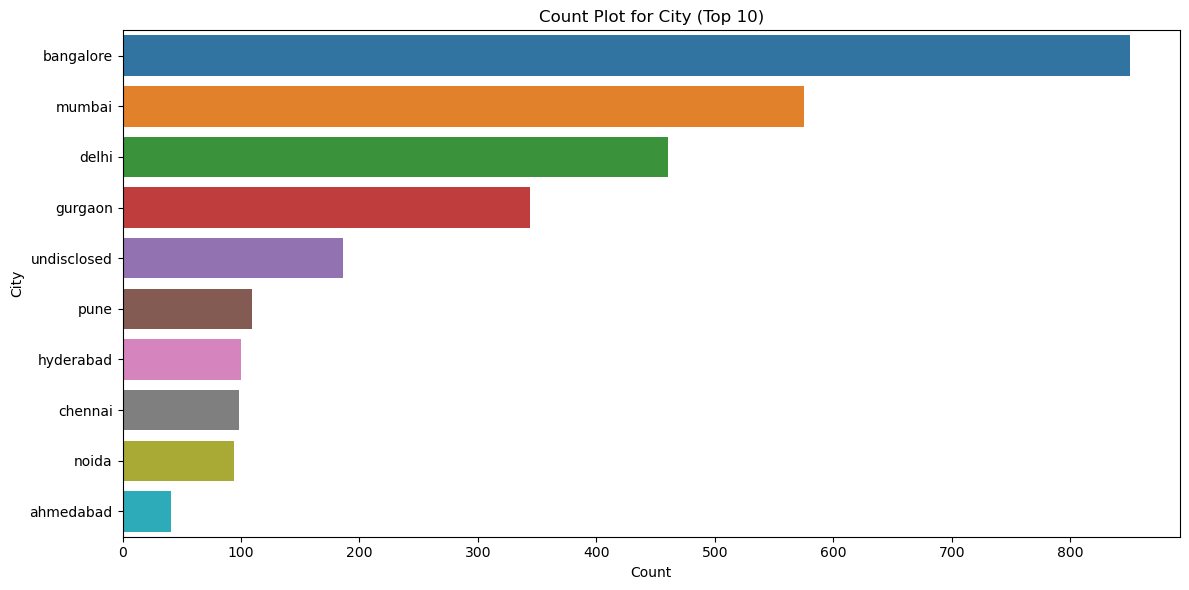

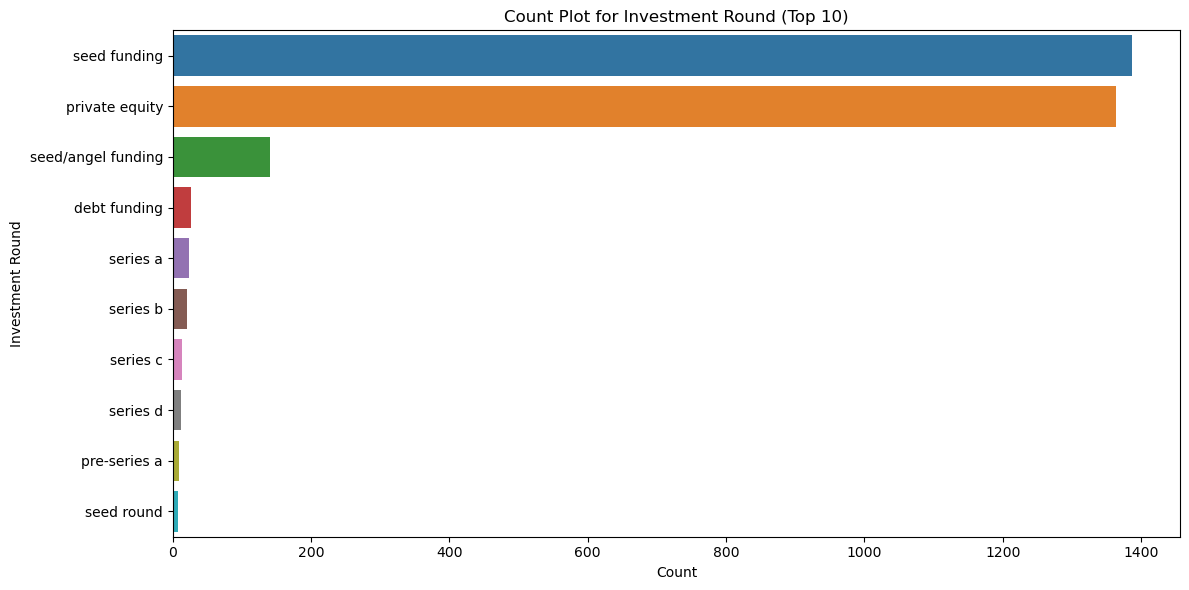

In [66]:
categorical_columns = ['Vertical', 'City', 'Investment Round']

for i in categorical_columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, y=i, order=df[i].value_counts().index[:10])
    plt.title(f"Count Plot for {i} (Top 10)")
    plt.xlabel("Count")
    plt.ylabel(i)
    plt.tight_layout()
    plt.show()


### Boxplot for outliers in 'Amount in INR'

In [67]:

# # Boxplot for outliers in 'Amount in INR'
# plt.figure(figsize=(12, 6))
# sns.boxplot(x=df[numeric_column], color='green')
# plt.title(f"Boxplot of {numeric_column}")
# plt.xlabel("Amount in INR")
# plt.tight_layout()
# plt.show()



In [68]:
# Q1 = df['Amount in INR'].quantile(0.25)
# Q3 = df['Amount in INR'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # outliers = df[(df['Amount in INR'] < lower_bound) | (df['Amount in INR'] > upper_bound)]
# # print(outliers)

# # outliers = df.loc[(df['Amount in INR'] < lower_bound) | (df['Amount in INR'] > upper_bound)]['Amount in INR']


# lower_bound_outliers = df.loc[(df['Amount in INR'] < lower_bound)]['Amount in INR']
# upper_bound_outliers = df.loc[(df['Amount in INR'] > upper_bound)]['Amount in INR']


# upper_bound_outliers.min()


### Bivariate Analysis

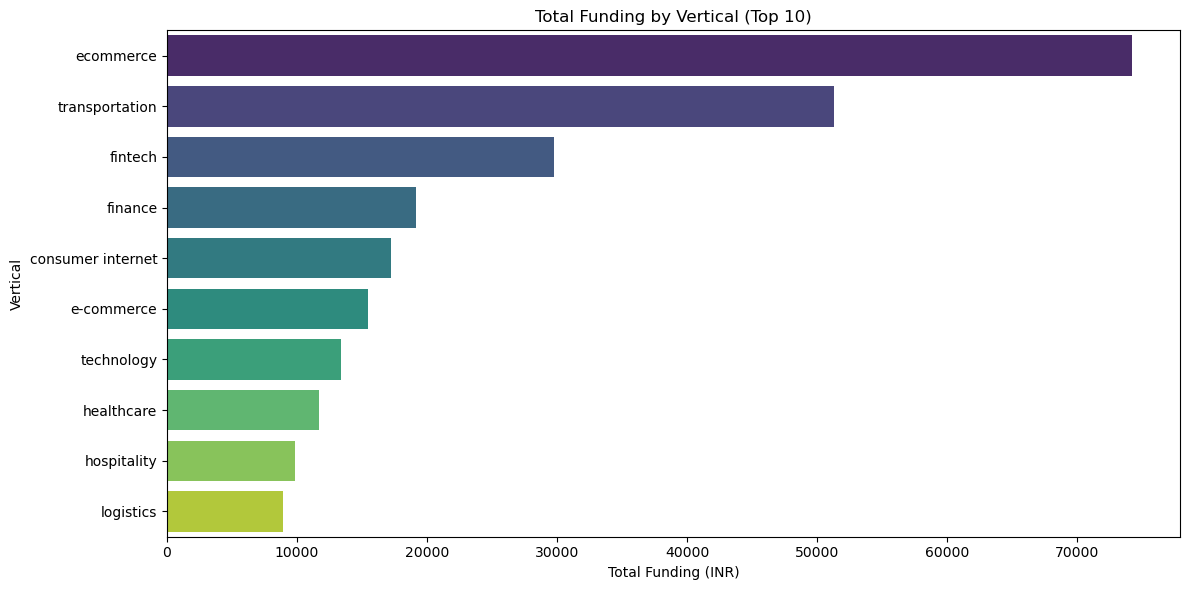

In [69]:
# Total funding by Vertical
vertical_funding = df.groupby('Vertical')['Amount in INR'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=vertical_funding.values, y=vertical_funding.index, palette="viridis")
plt.title("Total Funding by Vertical (Top 10)")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Vertical")
plt.tight_layout()
plt.show()

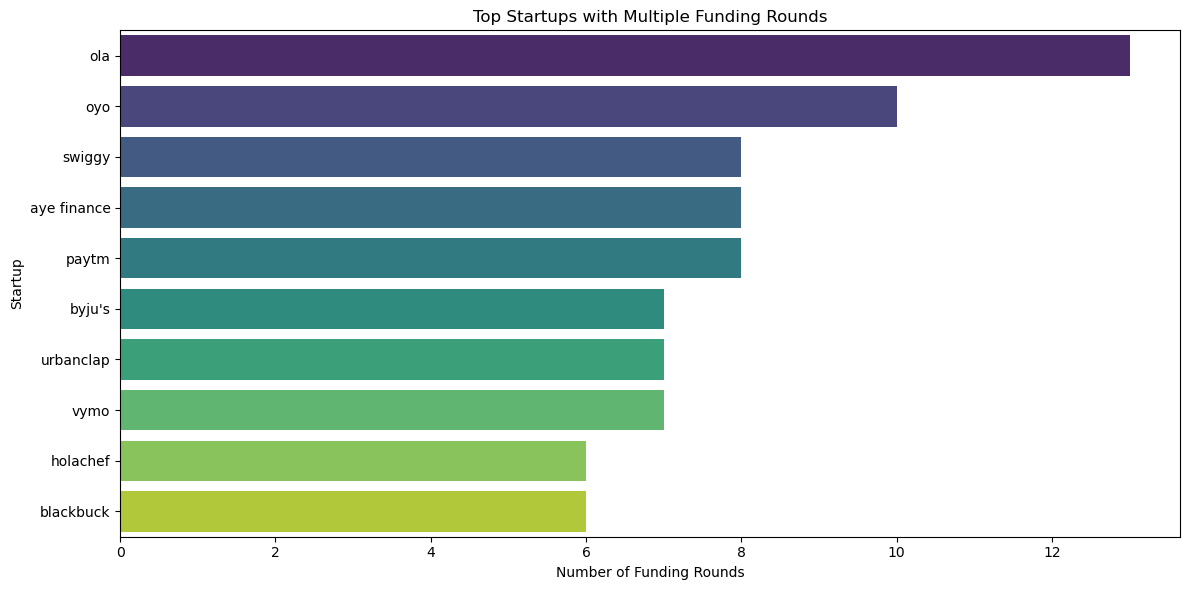

In [70]:
# Identify startups with multiple funding rounds
multiple_rounds = df['Startup'].value_counts().reset_index()
multiple_rounds.columns = ['Startup', 'Funding Count']
multiple_rounds = multiple_rounds[multiple_rounds['Funding Count'] > 1]

# Visualize the top 10 startups with multiple funding rounds
top_multiple_rounds = multiple_rounds.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_multiple_rounds, x='Funding Count', y='Startup', palette='viridis')
plt.title("Top Startups with Multiple Funding Rounds")
plt.xlabel("Number of Funding Rounds")
plt.ylabel("Startup")
plt.tight_layout()
plt.show()

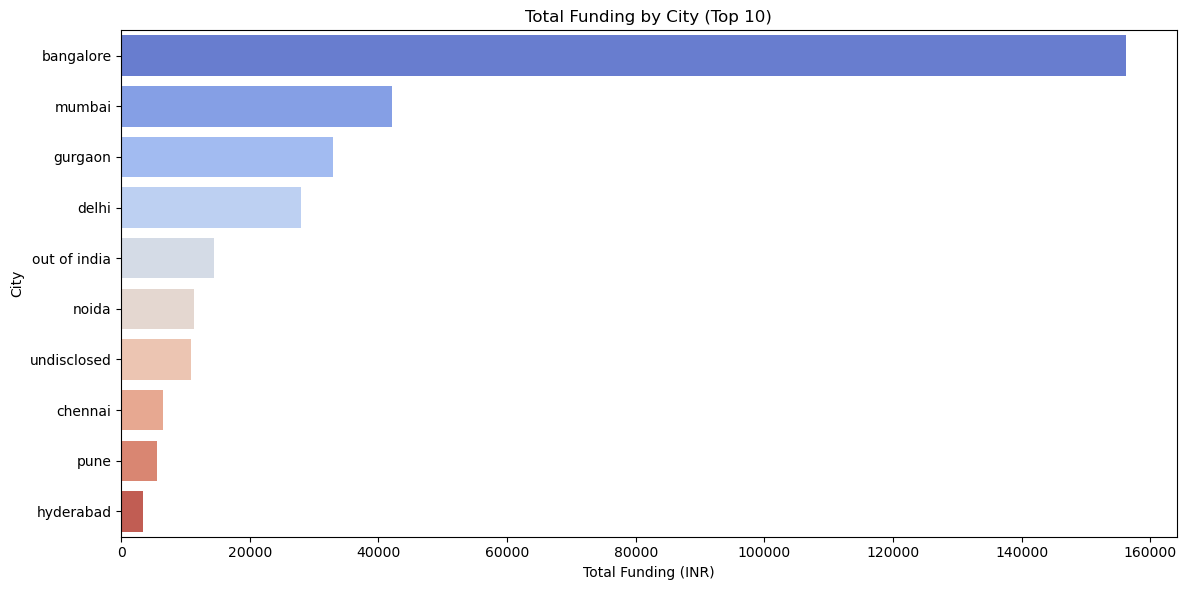

In [71]:

# Total funding by City
city_funding = df.groupby('City')['Amount in INR'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_funding.values, y=city_funding.index, palette="coolwarm")
plt.title("Total Funding by City (Top 10)")
plt.xlabel("Total Funding (INR)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

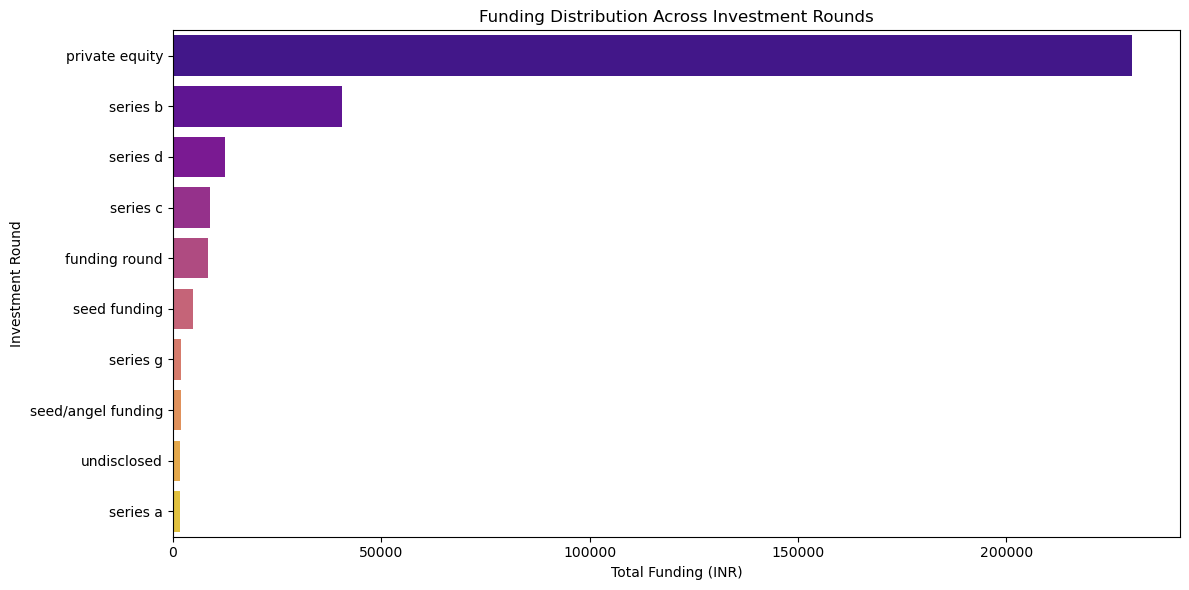

In [72]:
# Funding distribution across Investment Round
investment_round_funding = df.groupby('Investment Round')['Amount in INR'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=investment_round_funding.values, y=investment_round_funding.index, palette="plasma")
plt.title("Funding Distribution Across Investment Rounds")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Investment Round")
plt.tight_layout()
plt.show()

### Time-Series Analysis


In [73]:
# Enhanced Line Graph for Total Funding Per Year
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_funding.index, y=yearly_funding.values, marker='o', color="orange")
for year, funding in zip(yearly_funding.index, yearly_funding.values):
    plt.text(year, funding, f"{funding:.0f}", fontsize=9, ha='center', va='bottom')  
plt.title("Total Funding Per Year")
plt.xlabel("Year")
plt.ylabel("Total Funding (INR)")
plt.tight_layout()
plt.show()

NameError: name 'yearly_funding' is not defined

<Figure size 1200x600 with 0 Axes>

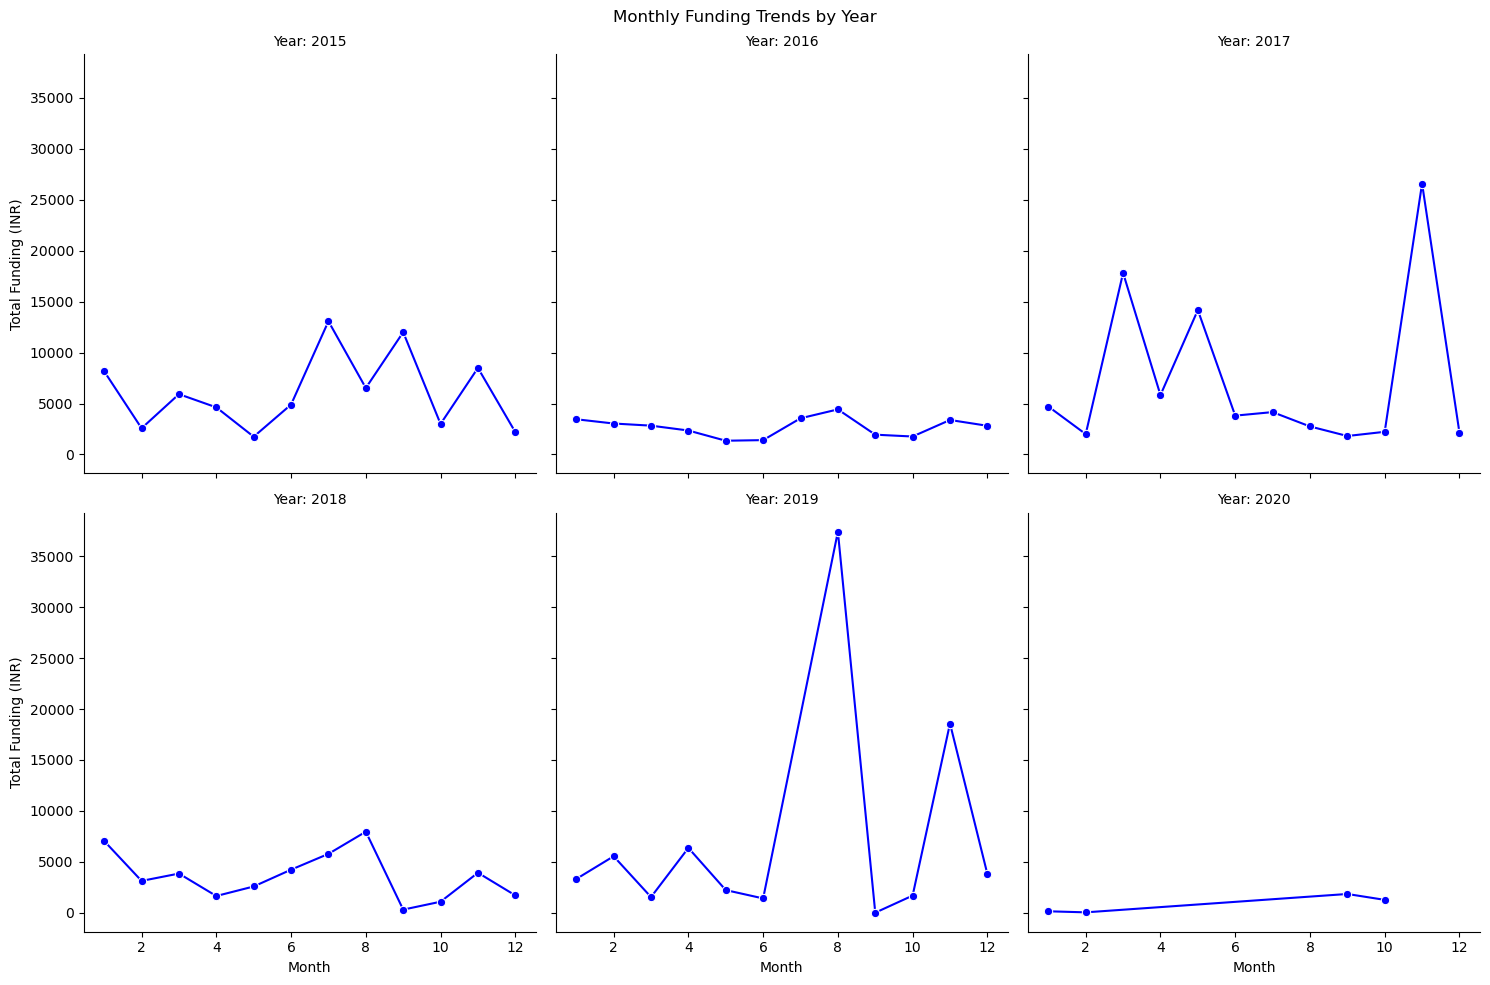

In [74]:
# Prepare data for visualization
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
monthly_funding = df.groupby(['Year', 'Month'])['Amount in INR'].sum().reset_index()

# Create a Faceted Line Plot
g = sns.FacetGrid(monthly_funding, col="Year", col_wrap=3, height=5, sharey=True)
g.map(sns.lineplot, "Month", "Amount in INR", marker='o', color='blue')
g.set_titles("Year: {col_name}")
g.set_axis_labels("Month", "Total Funding (INR)")  # Corrected labels
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Monthly Funding Trends by Year")
plt.tight_layout()
plt.show()

### Correlation Analysis

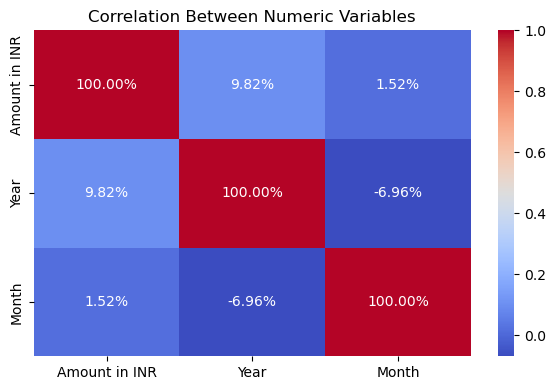

In [75]:

# Correlation between numeric variables
numeric_columns = [
 'Amount in INR',
 'Year',
 'Month']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2%")
plt.title("Correlation Between Numeric Variables")
plt.tight_layout()
plt.show()

### Multivariate Analysis

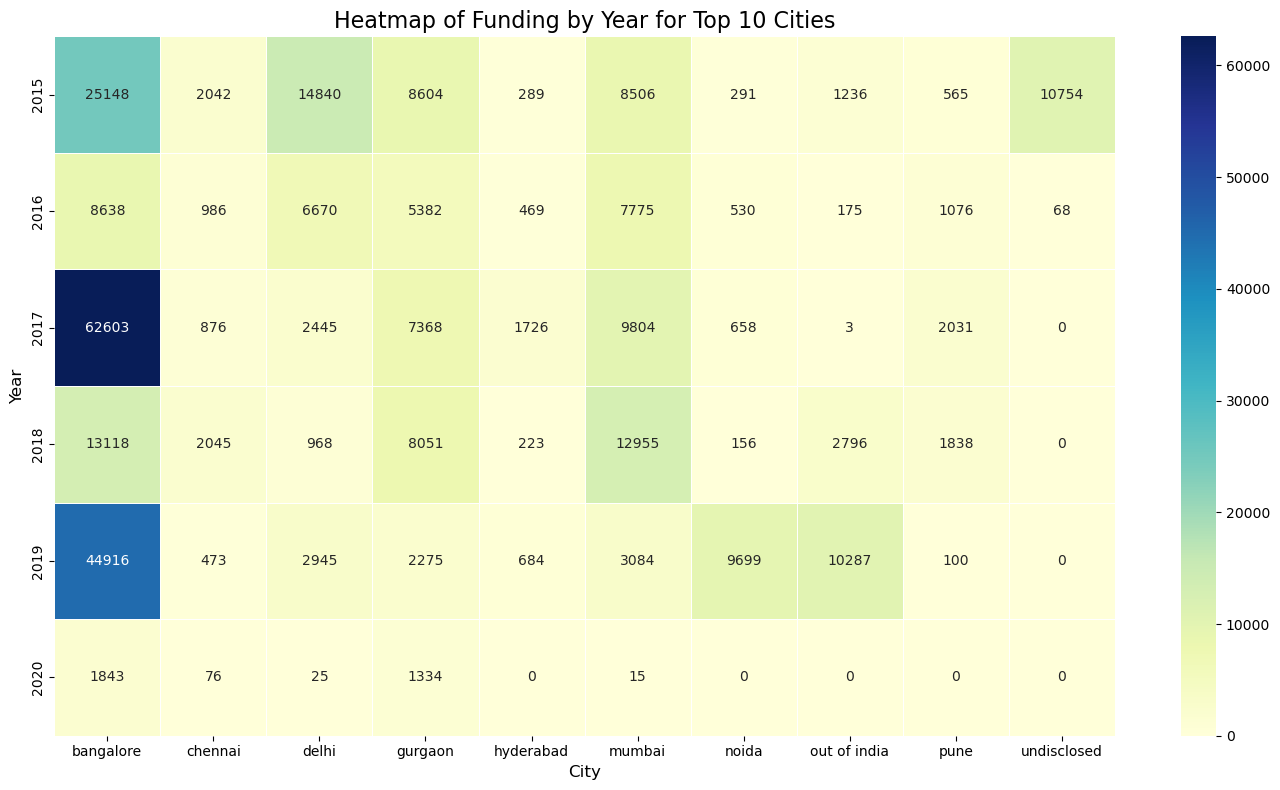

In [76]:
top_cities = df.groupby('City')['Amount in INR'].sum().sort_values(ascending=False).head(10).index
top_cities_data = df[df['City'].isin(top_cities)]

# Group funding by Year and City
heatmap_data = top_cities_data.groupby(['Year', 'City'])['Amount in INR'].sum().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of Funding by Year for Top 10 Cities", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.tight_layout()
plt.show()

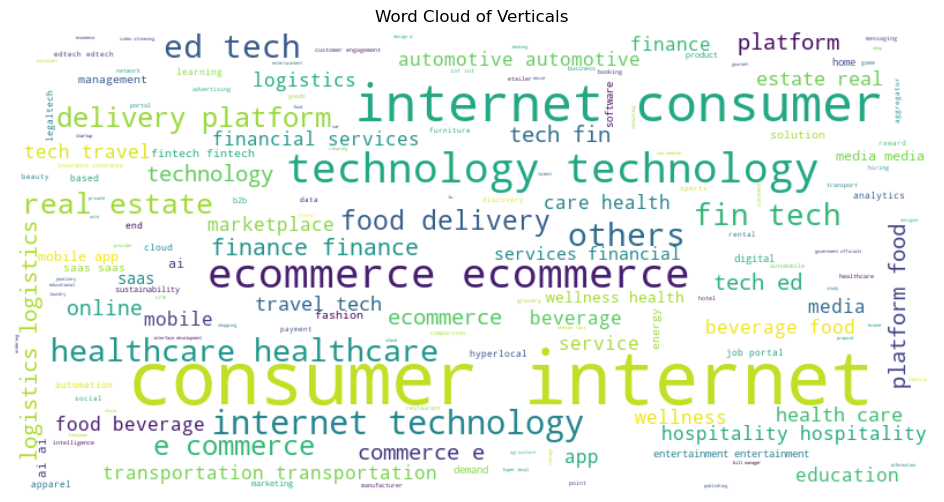

In [77]:
from wordcloud import WordCloud
import plotly.express as px

# 5 Word Cloud of Verticals

vertical_text = " ".join(df['Vertical'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(vertical_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Verticals")
plt.show()


In [78]:
import plotly.express as px

# Prepare data for treemap visualization
geo_trends = df.groupby(['Year', 'City'])['Amount in INR'].sum().reset_index()

# Filter out cities with zero or NaN funding
geo_trends = geo_trends[geo_trends['Amount in INR'] > 0]

# Create a treemap
fig = px.treemap(
    geo_trends,
    path=['Year', 'City'],  # Hierarchical structure: Year -> City
    values='Amount in INR',  # Size of the rectangles
    title="Treemap of Funding by Year and City",
    color='Amount in INR',  # Color intensity based on funding amount
    color_continuous_scale='Viridis'  # Color scheme
)

# Customize layout
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

# Display the treemap
fig.show()

In [105]:
mat_df = df[df['Investor']=='matrix partners'][['Investor','Amount in INR']]
mat_df.sort_values(by='Amount in INR',ascending=False)

,Investor,Amount in INR
155,matrix partners,75.97
2641,matrix partners,50.65
499,matrix partners,42.20
1150,matrix partners,33.76
876,matrix partners,5.06
1519,matrix partners,0.00
2588,matrix partners,0.00


In [90]:
df['Investor'].sample(20)

2254                                 rohto pharmaceutical
1448                                    mayfield ventures
441                                the ten minute million
32                                   yournest angel fund,
2963                                   star india pvt ltd
734                         cross border angels & experts
1772                                  benori ventures llp
1519                                      matrix partners
2129                                      avendus finance
1963                         state street global advisors
1226                  kalaari capital accelerator program
392                                      undisclosed hnis
2569                                          kae capital
1313                                 gray matters capital
2047                                          sb ventures
114                                 undisclosed investors
2617    fidelity growth partners india, saif partners,...
2011    sachin

<Axes: ylabel='Amount in INR'>

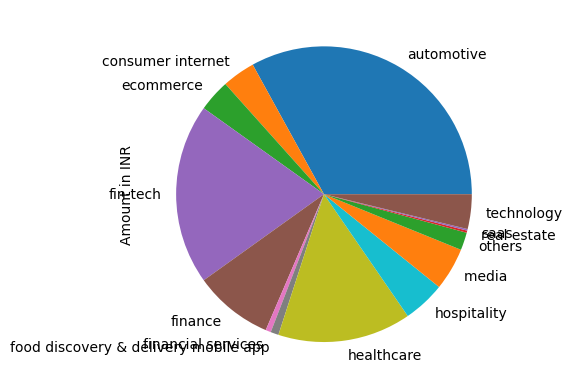

In [117]:
df[df['Investor']=='matrix partners']

,Date,Startup,Vertical,SubVertical,City,Investor,Investment Round,Amount in INR,Year,Month
155,2019-03-06,avail finance,finance,fintech,bangalore,matrix partners,series a,75.97,2019,3
499,2017-07-09,credit vidya,financial services,online credit scoring platform,mumbai,matrix partners,private equity,42.20,2017,7
876,2015-06-01,frankly,others,unknown,undisclosed,matrix partners,seed funding,5.06,2015,6
1150,2015-06-19,housejoy,technology,unknown,bangalore,matrix partners,private equity,33.76,2015,6
1519,2017-05-30,loadshare,logistics,express logistics network,bangalore,matrix partners,seed funding,0.00,2017,5
2588,2017-09-11,tilite technologies pvt. ltd,technology,saas based corporate travel management solution,bangalore,matrix partners,seed funding,0.00,2017,9
2641,2017-12-14,transversal technologies,technology,hyperlocal video information sharing platform,bangalore,matrix partners,private equity,50.65,2017,12
